In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel(io='data/Online Retail.xlsx', sheet_name='Online Retail') 

# Load Data

In [3]:
df.shape

(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Product Analytics

#### - Quantity Distribution

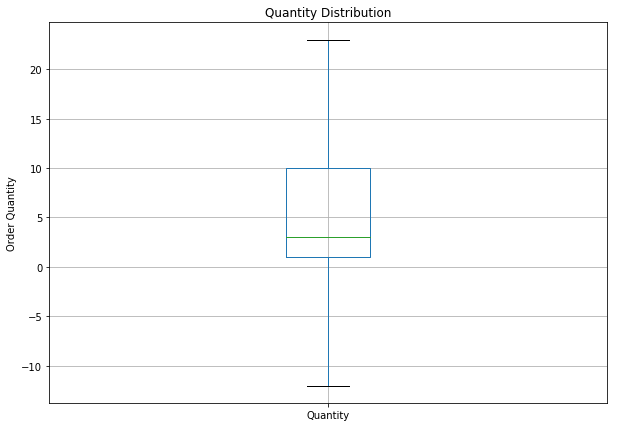

In [5]:
ax = df['Quantity'].plot.box(
    showfliers = False,
    grid=True,
    figsize=(10,7)
)

ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')

plt.suptitle("")
plt.show()

In [7]:
pd.DataFrame(df['Quantity'].describe())

,Quantity
count,541909.000000
mean,9.552250
std,218.081158
min,-80995.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


In [9]:
df.loc[df['Quantity'] > 0].shape

(531285, 8)

In [10]:
df.shape

(541909, 8)

#### - Time-series Number of Orders

In [11]:
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

In [12]:
monthly_orders_df

InvoiceDate
2010-12-31    2025
2011-01-31    1476
2011-02-28    1393
2011-03-31    1983
2011-04-30    1744
2011-05-31    2162
2011-06-30    2012
2011-07-31    1927
2011-08-31    1737
2011-09-30    2327
2011-10-31    2637
2011-11-30    3462
2011-12-31    1015
Freq: M, Name: InvoiceNo, dtype: int64

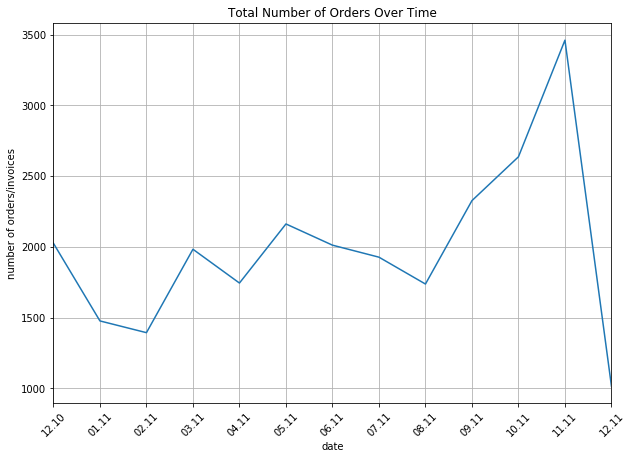

In [13]:
ax = pd.DataFrame(monthly_orders_df.values).plot(

    grid=True,
    figsize=(10, 7),
    legend=False
    
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(

    range(len(monthly_orders_df.index)),
    [x.strftime('%m.%y') for x in monthly_orders_df.index],
    rotation=45
    
)

plt.show()

In [24]:
invoice_dates = df.loc[df['InvoiceDate'] >= '2011-12-01', 'InvoiceDate']


In [25]:
minimum = invoice_dates.min()
maximum = invoice_dates.max()


In [26]:
print('Min date: %s\nMax date: %s' % (minimum, maximum))

Min date: 2011-12-01 08:12:00
Max date: 2011-12-09 12:50:00


In [27]:
df.loc[df['InvoiceDate'] > '2011-12-01'].shape

(25525, 8)

In [29]:
df.shape

(541909, 8)